# Covid Candles – Data Analysis
----

**Author:** Simon Aytes

**[GitHub](https://github.com/SimonAytes)**

**[Website](https://www.saytes.io)**

## Import libraries

In [19]:
import csv
import os
import pandas as pd
from datetime import timedelta
import datetime as dt
import numpy as np
from matplotlib import pyplot
import matplotlib

In [20]:
# Get path to the repo directory
dir_path = "/".join(os.getcwd().split("/")[0:-1])

# 1. Load processed data
----

In [56]:
negative_reviews_smell = pd.read_csv(open(dir_path + "/data/interim/negative-reviews-smell.csv"))

In [57]:
covid_data = pd.read_csv((dir_path + "/data/interim/covid_data.csv"))

# 2. Combine COVID-19 data and review data
----

## 2.1 Filter COVID-19 data

In [58]:
covid_data = covid_data[['date', 'new_cases']]

## 2.2 Calculate daily review counts

In [59]:
daily_counts = negative_reviews_smell['date'].value_counts()
daily_counts = daily_counts.to_frame().reset_index()
daily_counts = daily_counts.rename(columns={"index":"date", "date":"reviews"})

## 2.3 Combine data

The data will be joined on "date", however, due to there not always being a review on any given day, days with no reviews will have a value of 0.

In [60]:
daily_counts = covid_data.join(daily_counts.set_index('date'), on='date')
daily_counts = daily_counts.fillna(0)

In [61]:
daily_counts.head()

,date,new_cases,reviews
0,2020-01-22,0.0,0.0
1,2020-01-23,0.0,0.0
2,2020-01-24,1.0,1.0
3,2020-01-25,0.0,0.0
4,2020-01-26,3.0,0.0


## 2.4 Output combined data

In [62]:
daily_counts.to_csv((dir_path + "/data/processed/covid-reviews-daily.csv"), index=False)

# 3. Process combined data
----

## 3.1 Calculate 7-Day rolling average

In [63]:
# Seed data frame with reviews_by_day df
week_rolling_averages = daily_counts

# Get the 7 day rolling averages of reviews and new_cases, filling all NaNs' with 0
week_rolling_averages['reviews_rolling_avg'] = week_rolling_averages['reviews'].rolling(7).mean().fillna(0)
week_rolling_averages['cases_rolling_avg'] = week_rolling_averages['new_cases'].rolling(7).mean().fillna(0)

## 3.2 Output data

In [64]:
# Output to CSV
week_rolling_averages.to_csv((dir_path + "/data/processed/covid-reviews-weekly-avg.csv"), index=False)

## 3.3 Filter by date

For this project we are only looking at the months of October, November, and December 2021.

In [65]:
# Filter to only include data within the given data range
date_filter = (week_rolling_averages['date'] >= "2021-10-01") & (week_rolling_averages['date'] <= "2022-01-01")
week_rolling_averages = week_rolling_averages.loc[date_filter]

# 4. Normalize Data
----

In [66]:
normalized_rolling_avg = pd.DataFrame()
normalized_rolling_avg['date'] = week_rolling_averages['date']

## 4.1 Min/max normalization

In [67]:
# Normalize new cases
normalized_rolling_avg['norm_new_cases'] = (week_rolling_averages['new_cases'] - week_rolling_averages['new_cases'].min()) / (week_rolling_averages['new_cases'].max() - week_rolling_averages['new_cases'].min())
# Normalize reviews
normalized_rolling_avg['norm_reviews'] = (week_rolling_averages['reviews'] - week_rolling_averages['reviews'].min()) / (week_rolling_averages['reviews'].max() - week_rolling_averages['reviews'].min())
# Normalize reviews rolling average
normalized_rolling_avg['norm_reviews_rolling_avg'] = (week_rolling_averages['reviews_rolling_avg'] - week_rolling_averages['reviews_rolling_avg'].min()) / (week_rolling_averages['reviews_rolling_avg'].max() - week_rolling_averages['reviews_rolling_avg'].min())
# Normalize new cases rolling average
normalized_rolling_avg['norm_cases_rolling_avg'] = (week_rolling_averages['cases_rolling_avg'] - week_rolling_averages['cases_rolling_avg'].min()) / (week_rolling_averages['cases_rolling_avg'].max() - week_rolling_averages['cases_rolling_avg'].min())

In [68]:
# Re-arrange data for formatting
normalized_rolling_avg = normalized_rolling_avg[['date', 'norm_reviews', 'norm_new_cases', 'norm_reviews_rolling_avg', 'norm_cases_rolling_avg']]

## 4.2 Output normalized data

In [69]:
# Output to CSV
normalized_rolling_avg.to_csv((dir_path + "/data/processed/normalized-covid-reviews-weekly-avg.csv"), index=False)

# 5. Visualize Data
----

## Correlation Plot

In [70]:
random_state = np.random.RandomState(0)
correlation_plot = normalized_rolling_avg[['norm_reviews_rolling_avg', 'norm_cases_rolling_avg']].corr()
correlation_plot.style.background_gradient(cmap='coolwarm')

,norm_reviews_rolling_avg,norm_cases_rolling_avg
norm_reviews_rolling_avg,1.000000,0.784402
norm_cases_rolling_avg,0.784402,1.000000


## Time Series (normalized, all-time)

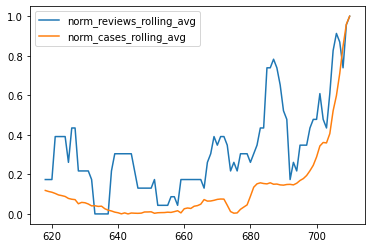

In [71]:
normalized_rolling_avg[['norm_reviews_rolling_avg', 'norm_cases_rolling_avg']].plot()
pyplot.show()

In [ ]:
oct_to_jan = (min_max_rolling_avg['date'] >= "2021-10-01") & (min_max_rolling_avg['date'] <= "2022-01-01")
oct_to_jan = min_max_rolling_avg.loc[holidays_date_filter]

In [ ]:
oct_to_jan

In [ ]:
rs = np.random.RandomState(0)
corr = oct_to_jan.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
oct_to_jan[['norm_reviews_rolling_avg', 'norm_cases_rolling_avg']].plot()
pyplot.show()